In [19]:
#!pip install scikit-fuzzy

In [1]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import numpy as np


In [2]:
comida = ctrl.Antecedent(np.arange(0,11,1), 'comida')
servicio = ctrl.Antecedent(np.arange(0,11,1), 'servicio')
propina = ctrl.Consequent(np.arange(0,11,1), 'propina')

In [3]:
propina

Consequent: propina

## Funcion de membresia o pertenencia para las entradas

In [4]:
comida.automf(3) # 3 = numero de conjuntos difusos
servicio.automf(3)

##Funciones de membresia para la salida

In [5]:
propina['baja'] = fuzz.trimf(propina.universe, [0,0,4])
propina['media'] = fuzz.trimf(propina.universe, [0,4,7])
propina['alta'] = fuzz.trapmf(propina.universe, [4,7,10,10])


f:\fusion_datos\codigo\fussy_env\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
f:\fusion_datos\codigo\fussy_env\lib\site-packages\skfuzzy\control\term.py:74: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


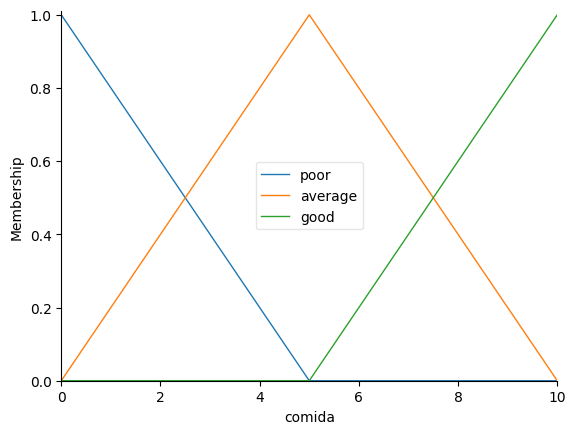

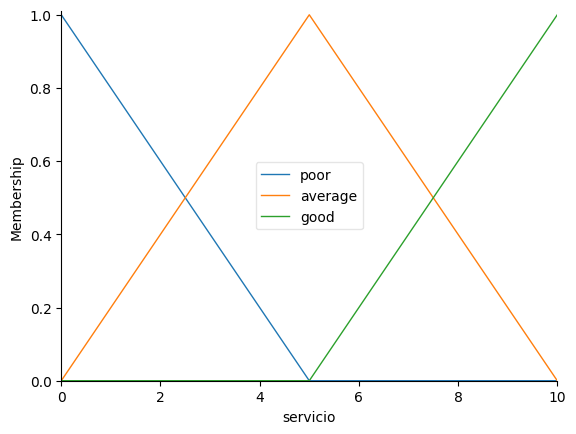

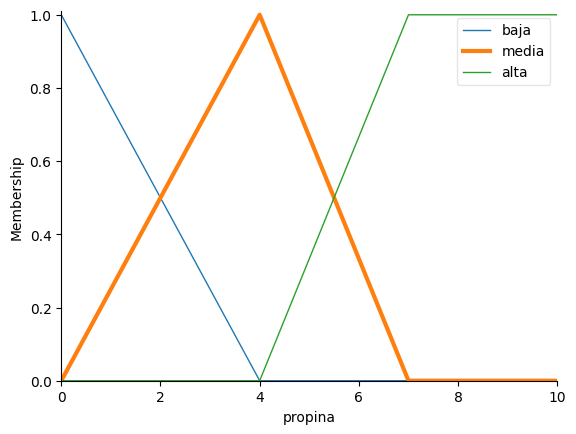

In [6]:
comida.view()
servicio.view()
propina["media"].view()



## Crear reglas

(<Figure size 640x480 with 1 Axes>, <Axes: >)

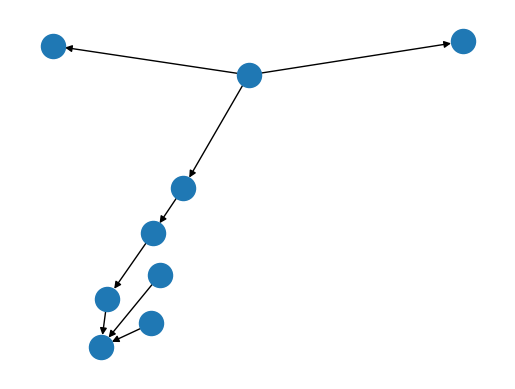

In [7]:
rule1 = ctrl.Rule(servicio['poor'] or comida['poor'], propina['baja'])
rule2 = ctrl.Rule(comida['average'] or servicio['average'], propina['media'])
rule3 = ctrl.Rule(comida['good'] or servicio['good'], propina['alta'])
rule1.view()

In [8]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
FIS = ctrl.ControlSystemSimulation(tipping_ctrl)

3.188835725677831


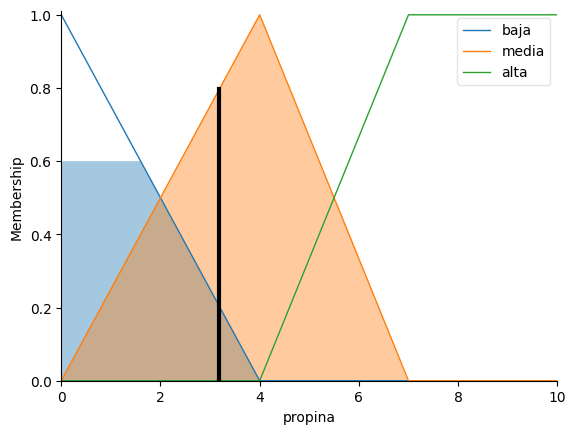

In [9]:
FIS.input['servicio'] = 2
FIS.input['comida'] = 5
FIS.compute()
print(FIS.output['propina'])
propina.view(sim=FIS)